In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
import math

In [2]:
############################################
#
# Varying parameter (others fixed to default)
#
var_name = 'Omega_cdm'
var_array = np.linspace(0.1,0.9,7)
var_num = len(var_array)
var_legend = r'$\Omega_cdm$'
var_figname = 'Omega_cdm'
#
# Constraints to be matched
#
# As explained in the "Neutrino cosmology" book, CUP, Lesgourgues et al., section 5.3, the goal is to vary
# - omega_cdm by a factor alpha = (1 + coeff*Neff)/(1 + coeff*3.046)
# - h by a factor sqrt*(alpha)
# in order to keep a fixed z_equality(R/M) and z_equality(M/Lambda)
#
omega_b = 0.0224
h=0.725
A_s=2.9e-09
n_s=1.01

#log_Omega_cdmransition_udm=3.3
#Omega_Lambda=0.0
Omega_fld=0.0
Omega_scf=0.0
output = 'tCl,pCl,lCl,mPk'
lensing='yes'
P_k_max=10.0
#

#
#############################################
#
# Fixed settings
#
common_settings = {'omega_b':omega_b,
                   #'omega_cdm':omega_cdm,
                   'h':h,
                   'A_s':A_s,
                   'n_s':n_s,
                   #'Omega_Lambda': Omega_Lambda,
                   'Omega_fld': Omega_fld,
                   'Omega_scf': Omega_scf,
                   'output': output,
                   'lensing': lensing,
                   'gauge': 'sync'
                   }

#
##############################################
#
# loop over varying parameter values
#
LCDM = {}
#
for i, Omega_cdm in enumerate(var_array):

    print (' * Compute with %s=%e'%('Omega_cdm',Omega_cdm))
    #
    # call CLASS
    #
    LCDM[i] = Class()
    LCDM[i].set(common_settings)
    LCDM[i].set({'P_k_max_1/Mpc':3.0})
    LCDM[i].set({'Omega_cdm':Omega_cdm})
    LCDM[i].compute()

 * Compute with Omega_cdm=1.000000e-01
 * Compute with Omega_cdm=2.333333e-01
 * Compute with Omega_cdm=3.666667e-01
 * Compute with Omega_cdm=5.000000e-01
 * Compute with Omega_cdm=6.333333e-01
 * Compute with Omega_cdm=7.666667e-01
 * Compute with Omega_cdm=9.000000e-01


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

0
1
2
3
4
5
6


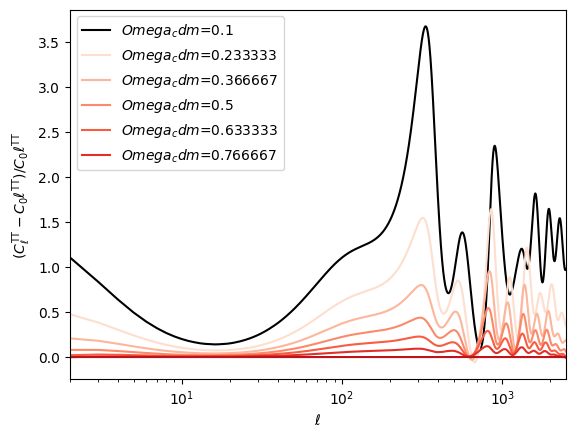

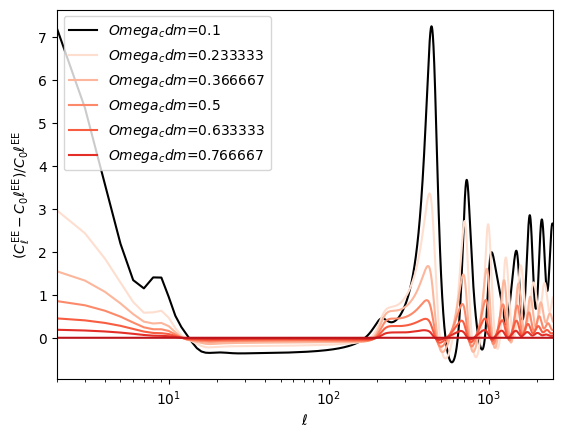

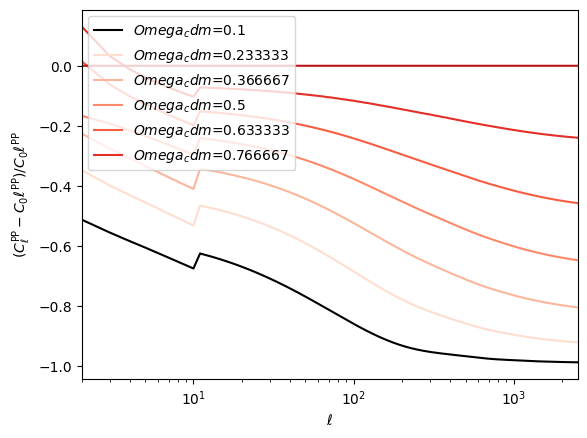

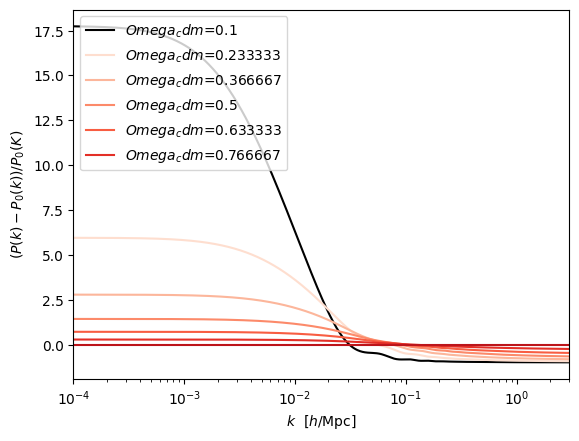

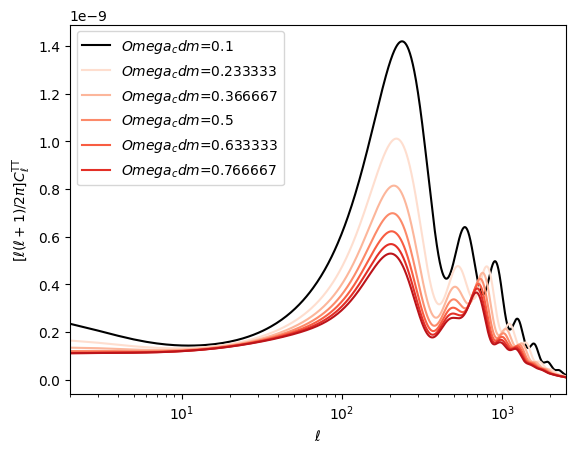

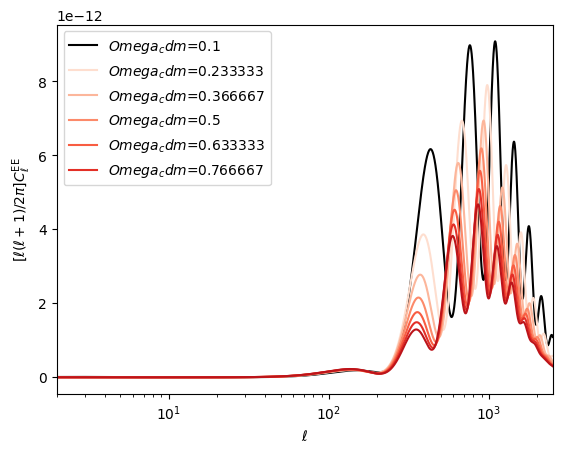

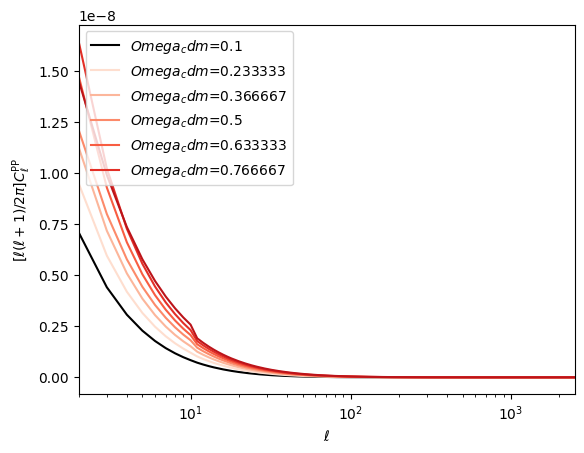

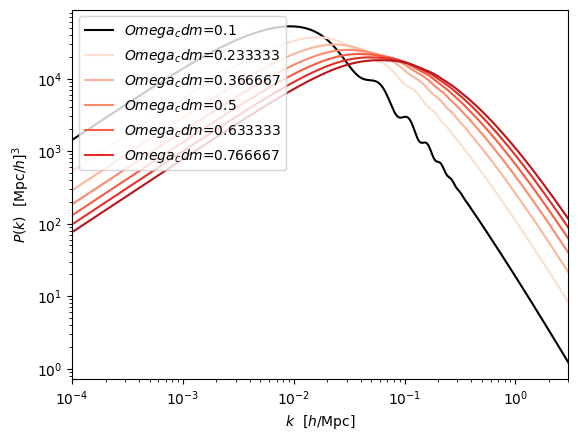

In [3]:
#############################################
#
# extract spectra and plot them
#
#############################################
#
for i, Omega_cdm in enumerate(var_array):

    if i == 0:
        var_color = 'k'
        var_alpha = 1.
    else:
        var_color = plt.cm.Reds(0.8*i/(var_num-1))
    

    background = LCDM[i].get_background()

    cls = LCDM[i].lensed_cl(2500)
    ll = cls['ell'][2:]
    clTT = cls['tt'][2:]
    clEE = cls['ee'][2:]
    clPP = cls['pp'][2:]
    print(i)
    if i == 0:
        cls_0 = LCDM[6].lensed_cl(2500)
        ll_0 = cls_0['ell'][2:]
        clTT_0 = cls_0['tt'][2:]
        clEE_0 = cls_0['ee'][2:]
        clPP_0 = cls_0['pp'][2:]
        plot_clTT_0 = clTT_0*ll*(ll+1)/2./math.pi
        plot_clEE_0 = clEE_0*ll*(ll+1)/2./math.pi
        plot_clPP_0 = clPP_0*ll*(ll+1)/2./math.pi
        kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
        Pk_0 = [] # P(k) in (Mpc/h)**3
        h = LCDM[6].h() # get reduced Hubble for conversions to 1/Mpc
        for k in kk:
            Pk_0.append(LCDM[6].pk(k*h,0.)*h**3) # function .pk(k,z)
        Pk_0 = np.float64(Pk_0)        
    # kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    # Pk = [] # P(k) in (Mpc/h)**3
    # h = LCDM[i].h() # get reduced Hubble for conversions to 1/Mpc
    # for k in kk:
    #     Pk.append(LCDM[i].pk(k*h,0.)*h**3) # function .pk(k,z)
    # if i == 0:
    #     ax_TT.semilogx(ll[i],clTT[i],
    #                    color=var_color,alpha=var_alpha,linestyle='-')
    # else:    
    #     ax_TT.semilogx(ll[i],clTT[i],
    #                    color=var_color,alpha=var_alpha,linestyle='-',
    #                   label=r'$\Delta N_\mathrm{eff}=%g$'%(N_ur-3.044))
#
    
    # plot C_l^TT
    plot_clTT = clTT*ll*(ll+1)/2./math.pi
    plt.figure(1)
    plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$(C_\ell^\mathrm{TT} - C_0\ell^\mathrm{TT})/C_0\ell^\mathrm{TT}$')
    plt.legend(loc='upper left')
    plt.plot(ll,(plot_clTT-plot_clTT_0)/plot_clTT_0,color=var_color, linestyle='-', label=r'$Omega_cdm$=%g'%(Omega_cdm))
    #plt.plot(ll,plot_clTT,color=var_color, linestyle='-', label=r'$\beta$=%g'%(log_beta_LCDM))

    #
    # plot C_l^EE
    plot_clEE = clEE*ll*(ll+1)/2./math.pi
    plt.figure(2)
    plt.xscale('log');plt.xlim(2,2500);plt.yscale('linear')
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$(C_\ell^\mathrm{EE} - C_0\ell^\mathrm{EE})/C_0\ell^\mathrm{EE}$')
    plt.legend(loc='upper left')
    plt.plot(ll,(plot_clEE-plot_clEE_0)/plot_clEE_0,color=var_color, linestyle='-', label=r'$Omega_cdm$=%g'%(Omega_cdm))
    #plt.plot(ll,plot_clEE,color=var_color, linestyle='-', label=r'$\beta$=%g'%(log_beta_LCDM))

    plot_clPP = clPP*ll*(ll+1)/2./math.pi
    plt.figure(3)
    plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$(C_\ell^\mathrm{PP} - C_0\ell^\mathrm{PP})/C_0\ell^\mathrm{PP}$')
    plt.legend(loc='upper left')
    plt.plot(ll,(plot_clPP-plot_clPP_0)/plot_clPP_0,color=var_color, linestyle='-', label=r'$Omega_cdm$=%g'%(Omega_cdm))
    #plt.plot(ll,plot_clPP,color=var_color, linestyle='-', label=r'$\beta$=%g'%(log_beta_LCDM))

    kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    Pk = [] # P(k) in (Mpc/h)**3
    h = LCDM[i].h() # get reduced Hubble for conversions to 1/Mpc
    for k in kk:
        Pk.append(LCDM[i].pk(k*h,0.)*h**3) # function .pk(k,z)
    #plot P(k)
    Pk = np.float64(Pk)
    plt.figure(4)
    plt.xscale('log');plt.yscale('linear');plt.xlim(kk[0],kk[-1]);#plt.ylim(1e+0,1e+5)
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$(P(k) - P_0(k))/P_0(K)$')
    plt.legend(loc='upper left')
    #plt.tight_layout()
    plt.plot(kk,(Pk-Pk_0)/Pk_0,color=var_color, linestyle='-', label=r'$Omega_cdm$=%g'%(Omega_cdm))

    #############################################
        # plot C_l^TT
    plot_clTT = clTT*ll*(ll+1)/2./math.pi
    plt.figure(5)
    plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
    plt.legend(loc='upper left')
    plt.plot(ll,(plot_clTT),color=var_color, linestyle='-', label=r'$Omega_cdm$=%g'%(Omega_cdm))
    #plt.plot(ll,plot_clTT,color=var_color, linestyle='-', label=r'$\beta$=%g'%(log_beta_LCDM))

    #
    # plot C_l^EE
    plot_clEE = clEE*ll*(ll+1)/2./math.pi
    plt.figure(6)
    plt.xscale('log');plt.xlim(2,2500);plt.yscale('linear')
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$')
    plt.legend(loc='upper left')
    plt.plot(ll,(plot_clEE),color=var_color, linestyle='-', label=r'$Omega_cdm$=%g'%(Omega_cdm))
    #plt.plot(ll,plot_clEE,color=var_color, linestyle='-', label=r'$\beta$=%g'%(log_beta_LCDM))

    plot_clPP = clPP*ll*(ll+1)/2./math.pi
    plt.figure(7)
    plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{PP}$')
    plt.legend(loc='upper left')
    plt.plot(ll,(plot_clPP),color=var_color, linestyle='-', label=r'$Omega_cdm$=%g'%(Omega_cdm))
    #plt.plot(ll,plot_clPP,color=var_color, linestyle='-', label=r'$\beta$=%g'%(log_beta_LCDM))

    kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    Pk = [] # P(k) in (Mpc/h)**3
    h = LCDM[i].h() # get reduced Hubble for conversions to 1/Mpc
    for k in kk:
        Pk.append(LCDM[i].pk(k*h,0.)*h**3) # function .pk(k,z)
    #plot P(k)
    Pk = np.float64(Pk)
    plt.figure(8)
    plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1]);#plt.ylim(1e+0,1e+5)
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.legend(loc='upper left')
    #plt.tight_layout()
    plt.plot(kk,(Pk),color=var_color, linestyle='-', label=r'$Omega_cdm$=%g'%(Omega_cdm))

